# Introduction

Cars are popular mode of transport. There are many companies who manufacture them and there are several features which can influence their price. The goal of this project is to compare different regression models to predict the price of a car. 

The data come from the Kaggle dataset Car Features and MSRP of Kaggle. It describes almost 12000 car models sold in the USA between 1990 and 2018 with the market price (new or used) and some features. This project is performed to carry out some data manipulations and carry out exploratory data analysis .

### Description of Data
Dataset from Kaggle : https://www.kaggle.com/CooperUnion/cardataset

This dataset contains more of 15 features of the car such as Make, Model, Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG, vehicle size,  and many more. 

## Importing the required libraries for Price Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
pd.set_option('max_columns', None)

## Loading csv into pandas dataframe

In [3]:
df = pd.read_csv('C:/Users/sidsh/Desktop/data.csv')

In [4]:
df.shape

(11914, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df.count()

Make                 11914
Model                11914
Year                 11914
Engine Fuel Type     11911
Engine HP            11845
Engine Cylinders     11884
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64

Data does not have similar length suggesting there are null values and duplicates, in the following step data filtering will be performed. For duplicates, the data will be dropped. For null values, it can either be dropped or filled. 

### New Dataset by dropping duplicates and null values

In [8]:
dff = df.drop_duplicates()

In [9]:
print(dff.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [10]:
dffd = dff.dropna() 
dffd.count()

Make                 7735
Model                7735
Year                 7735
Engine Fuel Type     7735
Engine HP            7735
Engine Cylinders     7735
Transmission Type    7735
Driven_Wheels        7735
Number of Doors      7735
Market Category      7735
Vehicle Size         7735
Vehicle Style        7735
highway MPG          7735
city mpg             7735
Popularity           7735
MSRP                 7735
dtype: int64

After cleaning data by droping duplicates and null values the data are of similar length

### Another dataset by filling in missing values 

In [11]:
dfff=dff.copy()
dfff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11199 non-null object
Model                11199 non-null object
Year                 11199 non-null int64
Engine Fuel Type     11196 non-null object
Engine HP            11130 non-null float64
Engine Cylinders     11169 non-null float64
Transmission Type    11199 non-null object
Driven_Wheels        11199 non-null object
Number of Doors      11193 non-null float64
Market Category      7823 non-null object
Vehicle Size         11199 non-null object
Vehicle Style        11199 non-null object
highway MPG          11199 non-null int64
city mpg             11199 non-null int64
Popularity           11199 non-null int64
MSRP                 11199 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [12]:
dfff['Market Category'] = dfff['Market Category'].fillna("Missing")
dfff['Engine Fuel Type'] = dfff['Engine Fuel Type'].fillna("Missing")

In [13]:
dfff['Engine HP'] = dfff['Engine HP'].fillna(dfff['Engine HP'].mean())
dfff['Engine Cylinders'] = dfff['Engine Cylinders'].fillna(dfff['Engine Cylinders'].mode()[0])
dfff['Number of Doors'] = dfff['Number of Doors'].fillna(dfff['Number of Doors'].mode()[0])

In [14]:
dfff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11199 non-null object
Model                11199 non-null object
Year                 11199 non-null int64
Engine Fuel Type     11199 non-null object
Engine HP            11199 non-null float64
Engine Cylinders     11199 non-null float64
Transmission Type    11199 non-null object
Driven_Wheels        11199 non-null object
Number of Doors      11199 non-null float64
Market Category      11199 non-null object
Vehicle Size         11199 non-null object
Vehicle Style        11199 non-null object
highway MPG          11199 non-null int64
city mpg             11199 non-null int64
Popularity           11199 non-null int64
MSRP                 11199 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


After cleaning data by filling null values using mean and mode, the data are of similar length

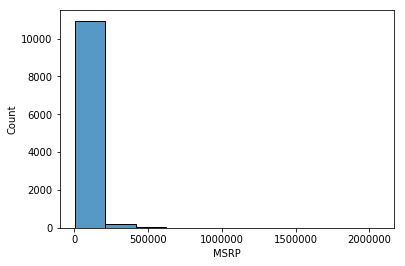

In [15]:
sns.histplot(x = 'MSRP', data = dfff, bins=10)
plt.show()

From the distribution data it is clear that there are outliers making the distribution highly skewed. To remove the skewed data I will limit the MSRP between 2000-100000 which are the most relevant market values for cars.  

In [16]:
dfilter= dfff[((dfff['MSRP']>2000) & (dfff['MSRP']< 100000))]

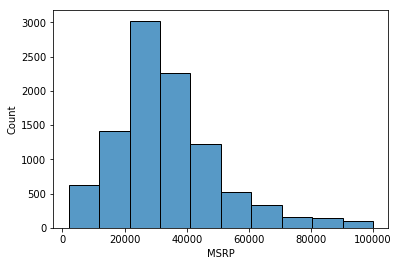

In [17]:
sns.histplot(x = 'MSRP', data = dfilter, bins=10)
plt.show()

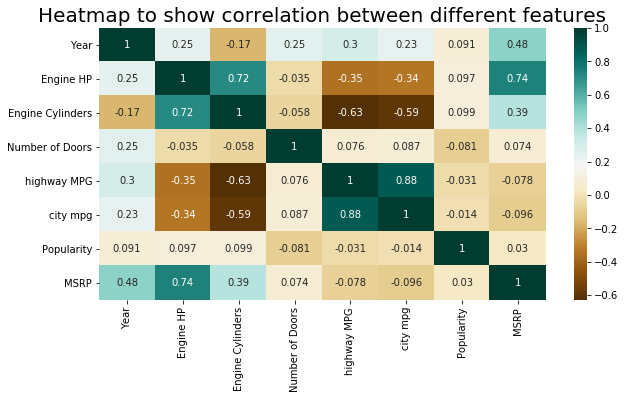

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.249725,-0.169520,0.252599,0.301629,0.231420,0.090700,0.480279
Engine HP,0.249725,1.000000,0.716228,-0.035398,-0.348248,-0.337785,0.097340,0.741268
Engine Cylinders,-0.169520,0.716228,1.000000,-0.057504,-0.627464,-0.590028,0.099163,0.386640
Number of Doors,0.252599,-0.035398,-0.057504,1.000000,0.075559,0.087438,-0.080940,0.073604
highway MPG,0.301629,-0.348248,-0.627464,0.075559,1.000000,0.879210,-0.031303,-0.077902
city mpg,0.231420,-0.337785,-0.590028,0.087438,0.879210,1.000000,-0.013569,-0.095702
Popularity,0.090700,0.097340,0.099163,-0.080940,-0.031303,-0.013569,1.000000,0.029740
MSRP,0.480279,0.741268,0.386640,0.073604,-0.077902,-0.095702,0.029740,1.000000


In [18]:
plt.figure(figsize=(10,5))
c = dfilter.corr()
sns.heatmap(c,cmap='BrBG', annot= True)
plt.title('Heatmap to show correlation between different features',fontsize=20 )
plt.show()
c

#### From heatmaps we can deliniate that
Horsepower (Engine HP), Engine cylinders and Year are strongly correlated with MSRP.  
City and highway MPG are correlated.    
Year and horsepower are correlated.

### Preprocessing data and preparing for prediction algorithm

#### The dataset prepared by filling null values will be used

### Multi hot encoding for Market Category 

In [34]:
def multihot_encode(df, column):
    df = df.copy()
    
    df[column] = df[column].apply(lambda x: x.split(','))
    
    all_categories = np.unique(df[column].sum())
    
    for category in all_categories:
        df[column + '_' + category] = df.apply(lambda x: 1 if category in x[column] else 0, axis=1)
    
    df = df.drop(column, axis=1)
    
    return df

In [37]:
dfcm = multihot_encode(dfff, column='Market Category')

### One hot encoding for other categorical datatypes

In [39]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [40]:
for column in dfcm.select_dtypes('object').columns:
        dfcm = onehot_encode(dfcm, column=column)

In [41]:
dfcm.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Market Category_Crossover,Market Category_Diesel,Market Category_Exotic,Market Category_Factory Tuner,Market Category_Flex Fuel,Market Category_Hatchback,Market Category_High-Performance,Market Category_Hybrid,Market Category_Luxury,Market Category_Missing,Market Category_Performance,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Bugatti,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_Ferrari,Make_Ford,Make_GMC,Make_Genesis,Make_HUMMER,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Kia,Make_Lamborghini,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_Maserati,Make_Maybach,Make_Mazda,Make_McLaren,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Rolls-Royce,Make_Saab,Make_Scion,Make_Spyker,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Model_1 Series,Model_1 Series M,Model_100,Model_124 Spider,Model_190-Class,Model_2,Model_2 Series,Model_200,Model_200SX,Model_240,Model_240SX,Model_3,Model_3 Series,Model_3 Series Gran Turismo,Model_300,Model_300-Class,Model_3000GT,Model_300M,Model_300ZX,Model_323,Model_350-Class,Model_350Z,Model_360,Model_370Z,Model_4 Series,Model_4 Series Gran Coupe,Model_400-Class,Model_420-Class,Model_456M,Model_458 Italia,Model_4C,Model_4Runner,Model_5,Model_5 Series,Model_5 Series Gran Turismo,Model_500,Model_500-Class,Model_500L,Model_500X,Model_500e,Model_550,Model_560-Class,Model_57,Model_570S,Model_575M,Model_599,Model_6,Model_6 Series,Model_6 Series Gran Coupe,Model_600-Class,Model_6000,Model_612 Scaglietti,Model_62,Model_626,Model_650S Coupe,Model_650S Spider,Model_7 Series,Model_718 Cayman,Model_740,Model_760,Model_780,Model_8 Series,Model_80,Model_850,Model_86,Model_9-2X,Model_9-3,Model_9-3 Griffin,Model_9-4X,Model_9-5,Model_9-7X,Model_90,Model_900,Model_9000,Model_911,Model_928,Model_929,Model_940,Model_944,Model_960,Model_968,Model_A3,Model_A4,Model_A4 allroad,Model_A5,Model_A6,Model_A7,Model_A8,Model_ALPINA B6 Gran Coupe,Model_ALPINA B7,Model_AMG GT,Model_ATS,Model_ATS Coupe,Model_ATS-V,Model_Acadia,Model_Acadia Limited,Model_Accent,Model_Acclaim,Model_Accord,Model_Accord Crosstour,Model_Accord Hybrid,Model_Accord Plug-In Hybrid,Model_Achieva,Model_ActiveHybrid 5,Model_ActiveHybrid 7,Model_ActiveHybrid X6,Model_Aerio,Model_Aerostar,Model_Alero,Model_Allante,Model_Alpina,Model_Altima,Model_Altima Hybrid,Model_Amanti,Model_Armada,Model_Arnage,Model_Aspen,Model_Aspire,Model_Astro,Model_Astro Cargo,Model_Aurora,Model_Avalanche,Model_Avalon,Model_Avalon Hybrid,Model_Avenger,Model_Aventador,Model_Aveo,Model_Aviator,Model_Axxess,Model_Azera,Model_Aztek,Model_Azure,Model_Azure T,Model_B-Class Electric Drive,Model_B-Series,Model_B-Series Pickup,Model_B-Series Truck,Model_B9 Tribeca,Model_BRZ,Model_Baja,Model_Beetle,Model_Beetle Convertible,Model_Beretta,Model_Black Diamond Avalanche,Model_Blackwood,Model_Blazer,Model_Bolt EV,Model_Bonneville,Model_Borrego,Model_Boxster,Model_Bravada,Model_Breeze,Model_Bronco,Model_Bronco II,Model_Brooklands,Model_Brougham,Model_C-Class,Model_C-Max Hybrid,Model_C/K 1500 Series,Model_C/K 2500 Series,Model_C30,Model_C36 AMG,Model_C43 AMG,Model_C70,Model_C8,Model_CC,Model_CL,Model_CL-Class,Model_CLA-Class,Model_CLK-Class,Model_CLS-Class,Model_CR-V,Model_CR-Z,Model_CT 200h,Model_CT6,Model_CTS,Model_CTS Coupe,Model_CTS Wagon,Model_CTS-V,Model_CTS-V Coupe,Model_CTS-V Wagon,Model_CX-3,Model_CX-5,Model_CX-7,Model_CX-9,Model_Cabrio,Model_Cabriolet,Model_Cadenza,Model_Caliber,Model_California,Model_California T,Model_Camaro,Model_Camry,Model_Camry Hybrid,Model_Camry Solara,Model_Canyon,Model_Caprice,Model_Captiva Sport,Model_Caravan,Model_Carrera GT,Model_Cascada,Model_Catera,Model_Cavalier,Model_Cayenne,Model_Cayman,Model_Cayman S,Model_Celebrity,Model_Celica,Model_Century,Model_Challenger,Model_Charger,Model_Chevy Van,Model_Ciera,Model_Cirrus,M

### Splitting data into train and test sets

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
Y = dfcm['MSRP']
X = dfcm.drop('MSRP', axis=1)
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state=1)

In [50]:
X_train.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Market Category_Crossover,Market Category_Diesel,Market Category_Exotic,Market Category_Factory Tuner,Market Category_Flex Fuel,Market Category_Hatchback,Market Category_High-Performance,Market Category_Hybrid,Market Category_Luxury,Market Category_Missing,Market Category_Performance,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Bugatti,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_Ferrari,Make_Ford,Make_GMC,Make_Genesis,Make_HUMMER,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Kia,Make_Lamborghini,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_Maserati,Make_Maybach,Make_Mazda,Make_McLaren,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Rolls-Royce,Make_Saab,Make_Scion,Make_Spyker,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Model_1 Series,Model_1 Series M,Model_100,Model_124 Spider,Model_190-Class,Model_2,Model_2 Series,Model_200,Model_200SX,Model_240,Model_240SX,Model_3,Model_3 Series,Model_3 Series Gran Turismo,Model_300,Model_300-Class,Model_3000GT,Model_300M,Model_300ZX,Model_323,Model_350-Class,Model_350Z,Model_360,Model_370Z,Model_4 Series,Model_4 Series Gran Coupe,Model_400-Class,Model_420-Class,Model_456M,Model_458 Italia,Model_4C,Model_4Runner,Model_5,Model_5 Series,Model_5 Series Gran Turismo,Model_500,Model_500-Class,Model_500L,Model_500X,Model_500e,Model_550,Model_560-Class,Model_57,Model_570S,Model_575M,Model_599,Model_6,Model_6 Series,Model_6 Series Gran Coupe,Model_600-Class,Model_6000,Model_612 Scaglietti,Model_62,Model_626,Model_650S Coupe,Model_650S Spider,Model_7 Series,Model_718 Cayman,Model_740,Model_760,Model_780,Model_8 Series,Model_80,Model_850,Model_86,Model_9-2X,Model_9-3,Model_9-3 Griffin,Model_9-4X,Model_9-5,Model_9-7X,Model_90,Model_900,Model_9000,Model_911,Model_928,Model_929,Model_940,Model_944,Model_960,Model_968,Model_A3,Model_A4,Model_A4 allroad,Model_A5,Model_A6,Model_A7,Model_A8,Model_ALPINA B6 Gran Coupe,Model_ALPINA B7,Model_AMG GT,Model_ATS,Model_ATS Coupe,Model_ATS-V,Model_Acadia,Model_Acadia Limited,Model_Accent,Model_Acclaim,Model_Accord,Model_Accord Crosstour,Model_Accord Hybrid,Model_Accord Plug-In Hybrid,Model_Achieva,Model_ActiveHybrid 5,Model_ActiveHybrid 7,Model_ActiveHybrid X6,Model_Aerio,Model_Aerostar,Model_Alero,Model_Allante,Model_Alpina,Model_Altima,Model_Altima Hybrid,Model_Amanti,Model_Armada,Model_Arnage,Model_Aspen,Model_Aspire,Model_Astro,Model_Astro Cargo,Model_Aurora,Model_Avalanche,Model_Avalon,Model_Avalon Hybrid,Model_Avenger,Model_Aventador,Model_Aveo,Model_Aviator,Model_Axxess,Model_Azera,Model_Aztek,Model_Azure,Model_Azure T,Model_B-Class Electric Drive,Model_B-Series,Model_B-Series Pickup,Model_B-Series Truck,Model_B9 Tribeca,Model_BRZ,Model_Baja,Model_Beetle,Model_Beetle Convertible,Model_Beretta,Model_Black Diamond Avalanche,Model_Blackwood,Model_Blazer,Model_Bolt EV,Model_Bonneville,Model_Borrego,Model_Boxster,Model_Bravada,Model_Breeze,Model_Bronco,Model_Bronco II,Model_Brooklands,Model_Brougham,Model_C-Class,Model_C-Max Hybrid,Model_C/K 1500 Series,Model_C/K 2500 Series,Model_C30,Model_C36 AMG,Model_C43 AMG,Model_C70,Model_C8,Model_CC,Model_CL,Model_CL-Class,Model_CLA-Class,Model_CLK-Class,Model_CLS-Class,Model_CR-V,Model_CR-Z,Model_CT 200h,Model_CT6,Model_CTS,Model_CTS Coupe,Model_CTS Wagon,Model_CTS-V,Model_CTS-V Coupe,Model_CTS-V Wagon,Model_CX-3,Model_CX-5,Model_CX-7,Model_CX-9,Model_Cabrio,Model_Cabriolet,Model_Cadenza,Model_Caliber,Model_California,Model_California T,Model_Camaro,Model_Camry,Model_Camry Hybrid,Model_Camry Solara,Model_Canyon,Model_Caprice,Model_Captiva Sport,Model_Caravan,Model_Carrera GT,Model_Cascada,Model_Catera,Model_Cavalier,Model_Cayenne,Model_Cayman,Model_Cayman S,Model_Celebrity,Model_Celica,Model_Century,Model_Challenger,Model_Charger,Model_Chevy Van,Model_Ciera,Model_Cirrus,Model_

In [51]:
Y_train.head()

5974     39085
8590     31310
11297    34195
4309     40650
1065     39700
Name: MSRP, dtype: int64

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

C:\Users\sidsh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [53]:
X_train.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Market Category_Crossover,Market Category_Diesel,Market Category_Exotic,Market Category_Factory Tuner,Market Category_Flex Fuel,Market Category_Hatchback,Market Category_High-Performance,Market Category_Hybrid,Market Category_Luxury,Market Category_Missing,Market Category_Performance,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Bugatti,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_Ferrari,Make_Ford,Make_GMC,Make_Genesis,Make_HUMMER,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Kia,Make_Lamborghini,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_Maserati,Make_Maybach,Make_Mazda,Make_McLaren,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Rolls-Royce,Make_Saab,Make_Scion,Make_Spyker,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Model_1 Series,Model_1 Series M,Model_100,Model_124 Spider,Model_190-Class,Model_2,Model_2 Series,Model_200,Model_200SX,Model_240,Model_240SX,Model_3,Model_3 Series,Model_3 Series Gran Turismo,Model_300,Model_300-Class,Model_3000GT,Model_300M,Model_300ZX,Model_323,Model_350-Class,Model_350Z,Model_360,Model_370Z,Model_4 Series,Model_4 Series Gran Coupe,Model_400-Class,Model_420-Class,Model_456M,Model_458 Italia,Model_4C,Model_4Runner,Model_5,Model_5 Series,Model_5 Series Gran Turismo,Model_500,Model_500-Class,Model_500L,Model_500X,Model_500e,Model_550,Model_560-Class,Model_57,Model_570S,Model_575M,Model_599,Model_6,Model_6 Series,Model_6 Series Gran Coupe,Model_600-Class,Model_6000,Model_612 Scaglietti,Model_62,Model_626,Model_650S Coupe,Model_650S Spider,Model_7 Series,Model_718 Cayman,Model_740,Model_760,Model_780,Model_8 Series,Model_80,Model_850,Model_86,Model_9-2X,Model_9-3,Model_9-3 Griffin,Model_9-4X,Model_9-5,Model_9-7X,Model_90,Model_900,Model_9000,Model_911,Model_928,Model_929,Model_940,Model_944,Model_960,Model_968,Model_A3,Model_A4,Model_A4 allroad,Model_A5,Model_A6,Model_A7,Model_A8,Model_ALPINA B6 Gran Coupe,Model_ALPINA B7,Model_AMG GT,Model_ATS,Model_ATS Coupe,Model_ATS-V,Model_Acadia,Model_Acadia Limited,Model_Accent,Model_Acclaim,Model_Accord,Model_Accord Crosstour,Model_Accord Hybrid,Model_Accord Plug-In Hybrid,Model_Achieva,Model_ActiveHybrid 5,Model_ActiveHybrid 7,Model_ActiveHybrid X6,Model_Aerio,Model_Aerostar,Model_Alero,Model_Allante,Model_Alpina,Model_Altima,Model_Altima Hybrid,Model_Amanti,Model_Armada,Model_Arnage,Model_Aspen,Model_Aspire,Model_Astro,Model_Astro Cargo,Model_Aurora,Model_Avalanche,Model_Avalon,Model_Avalon Hybrid,Model_Avenger,Model_Aventador,Model_Aveo,Model_Aviator,Model_Axxess,Model_Azera,Model_Aztek,Model_Azure,Model_Azure T,Model_B-Class Electric Drive,Model_B-Series,Model_B-Series Pickup,Model_B-Series Truck,Model_B9 Tribeca,Model_BRZ,Model_Baja,Model_Beetle,Model_Beetle Convertible,Model_Beretta,Model_Black Diamond Avalanche,Model_Blackwood,Model_Blazer,Model_Bolt EV,Model_Bonneville,Model_Borrego,Model_Boxster,Model_Bravada,Model_Breeze,Model_Bronco,Model_Bronco II,Model_Brooklands,Model_Brougham,Model_C-Class,Model_C-Max Hybrid,Model_C/K 1500 Series,Model_C/K 2500 Series,Model_C30,Model_C36 AMG,Model_C43 AMG,Model_C70,Model_C8,Model_CC,Model_CL,Model_CL-Class,Model_CLA-Class,Model_CLK-Class,Model_CLS-Class,Model_CR-V,Model_CR-Z,Model_CT 200h,Model_CT6,Model_CTS,Model_CTS Coupe,Model_CTS Wagon,Model_CTS-V,Model_CTS-V Coupe,Model_CTS-V Wagon,Model_CX-3,Model_CX-5,Model_CX-7,Model_CX-9,Model_Cabrio,Model_Cabriolet,Model_Cadenza,Model_Caliber,Model_California,Model_California T,Model_Camaro,Model_Camry,Model_Camry Hybrid,Model_Camry Solara,Model_Canyon,Model_Caprice,Model_Captiva Sport,Model_Caravan,Model_Carrera GT,Model_Cascada,Model_Catera,Model_Cavalier,Model_Cayenne,Model_Cayman,Model_Cayman S,Model_Celebrity,Model_Celica,Model_Century,Model_Challenger,Model_Charger,Model_Chevy Van,Model_Ciera,Model_Cirrus,Model_

### Dimensionality Reduction using PCA

In [55]:
from sklearn.decomposition import PCA

n = 100

pca = PCA(n_components=n)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n + 1)])

In [56]:
X_train_reduced.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
5974,-1.360292,0.315092,-0.663747,-0.639991,-0.192353,-0.581765,0.102454,-0.467591,0.074446,0.219103,-0.052896,-0.548981,0.129175,0.069959,-0.058233,0.211340,-0.017113,-0.102220,-0.313346,0.062699,0.015313,0.327771,-0.169283,0.152594,-0.131786,0.099012,-0.059079,0.136461,-0.055374,-0.025678,-0.032203,-0.174574,0.051903,-0.074361,-0.045865,-0.103620,0.202655,-0.025905,-0.094627,0.136991,-0.247779,0.010692,0.021849,0.064792,-0.171156,0.204052,0.133825,0.274987,-0.090948,-0.248034,-0.475513,0.097279,-0.144509,-0.082468,0.038270,0.604127,0.073021,-0.122609,0.006013,-0.007528,-0.107079,-0.013258,0.020635,0.018974,0.008793,0.019513,0.033919,-0.013616,0.029258,0.014635,-0.013241,-0.012101,-0.008670,0.020034,-0.006398,-0.006155,0.030348,-0.018931,-0.002618,-0.000032,-0.009675,-0.008879,-0.018140,0.000728,-0.014815,0.012483,0.019504,-0.011332,-0.005968,-0.019805,-0.002771,-0.004950,0.028847,-0.011071,-0.012526,-0.008553,-0.005372,0.000240,-0.007332,0.027902
8590,-0.922883,-0.836295,-0.442993,1.027432,-0.613482,0.065879,0.216422,-0.091565,-0.128876,0.440790,-0.104700,0.159525,0.210350,0.039948,0.139547,-0.204429,-0.147897,0.227225,0.070291,-0.029328,-0.098878,0.279803,0.367619,0.595585,0.265685,0.035189,-0.327667,-0.283036,0.086904,-0.023054,-0.062518,-0.038418,0.024393,-0.010309,0.013602,0.016315,0.043535,-0.043360,-0.006674,0.092931,0.051906,-0.047516,-0.000995,-0.057271,0.018851,-0.074049,0.108452,0.045701,-0.057147,-0.077455,-0.038061,0.004040,0.004898,0.020330,0.013678,0.002650,0.019174,0.030068,-0.029159,0.044942,-0.002210,-0.066088,-0.039123,0.003431,-0.008053,0.007383,-0.014920,0.091699,0.056330,0.000144,0.045014,-0.061090,-0.050907,-0.051179,-0.025163,-0.006001,0.023849,0.018610,-0.010362,-0.001358,-0.008243,-0.034055,0.001822,-0.033683,0.021769,-0.019283,0.030208,-0.044862,-0.041987,-0.021457,-0.004800,-0.028852,-0.007737,0.014830,-0.014987,-0.040490,-0.030554,0.015418,0.003880,0.033652
11297,-0.466001,-1.118608,-0.621349,0.501491,-0.312577,0.669444,-0.095917,0.047846,-0.190482,-0.305216,-0.440865,0.394610,0.051560,-0.007538,-0.091077,-0.057084,-0.077862,0.169699,0.080542,-0.021416,0.037010,-0.008465,-0.091687,0.053861,-0.007548,-0.053538,0.080348,-0.084660,-0.092013,-0.049272,-0.000824,-0.017145,-0.133295,0.124166,-0.064080,0.012327,-0.048041,0.195680,0.055569,-0.387001,-0.016555,0.183249,0.672089,-0.054497,-0.451572,-0.038279,-0.083415,0.056978,-0.054142,-0.137148,0.128770,0.014963,-0.067433,0.000363,-0.020490,-0.049894,-0.087591,-0.017422,0.029731,-0.011017,-0.031321,-0.016336,0.008749,0.035598,0.008256,-0.017146,0.019800,-0.034900,-0.022094,-0.002246,0.000106,0.013739,0.019566,-0.021229,0.007266,0.008754,0.002539,0.001619,0.001830,0.006039,-0.006218,-0.007002,0.006816,-0.008897,-0.011351,0.021639,0.006054,0.006683,0.005398,-0.005656,0.005382,-0.000165,-0.000396,0.011250,0.026083,0.010551,0.003356,-0.001041,-0.009579,-0.008216
4309,-1.671694,0.044166,-0.948359,0.645446,-0.073874,0.054089,0.482575,0.775073,-0.022839,-0.030404,0.757612,0.074455,0.078359,-0.033739,0.033730,0.039612,0.108259,-0.219183,-0.160557,0.023024,-0.199048,-0.004698,-0.016178,-0.022683,-0.082687,-0.190541,0.010061,-0.184426,-0.167365,-0.074553,-0.019354,0.160127,-0.064817,-0.332748,-0.196932,-0.172515,-0.184877,-0.221551,0.458215,-0.109279,0.479629,-0.098908,0.064584,-0.105758,0.049385,-0.036335,-0.051961,-0.107650,0.087196,0.103167,0.054183,0.015075,-0.016535,0.004699,-0.114485,0.090385,0.001386,-0.041395,0.062925,-0.017650,-0.057317,0.043444,0.026702,0.055789,0.014546,

## Linear Regression, Ridge and Lasso

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#### Linear Regression, Ridge (Liner Regression [L2 Regularization]) and Lasso (Liner Regression [L1 Regularization]) 

In [175]:
reg = LinearRegression().fit(X_train,Y_train)
print('The linear regression R2 score is ' +  str(reg.score(X_train,Y_train)))
print(reg.coef_)
print(reg.intercept_)
regscore= reg.score(X_train,Y_train)
Y_reg = reg.predict(X_test)

The linear regression R2 score is 0.9881944408402883
[1.75996304e+04 1.12790267e+05 2.70815930e+03 ... 8.64573870e+16
 8.93574347e+16 8.93574347e+16]
5.639603824011272e+16


In [177]:
clf = Ridge().fit(X_train,Y_train)
print('The Ridge regression R2 score is ' +  str(clf.score(X_train,Y_train)))
print(clf.coef_)
print(clf.intercept_)
clfscore=clf.score(X_train,Y_train)
Y_clf = clf.predict(X_test)


The Ridge regression R2 score is 0.9611815091343457
[ 19735.27617164 152408.20002749  30200.70315771 ...   1231.77986278
  -5986.30841816  -4751.7966549 ]
-5075.00603761011


In [178]:
lasso = Lasso().fit(X_train,Y_train)
print('The Lassor regression R2 score is ' +  str(lasso.score(X_train,Y_train)))
print(lasso.coef_)
print(lasso.intercept_)
lassoscore=lasso.score(X_train,Y_train)
Y_lasso = lasso.predict(X_test)

The Lassor regression R2 score is 0.9875742239703886
[ 21722.1814299  112675.73143606   2769.72437432 ...  -2292.88669373
  -1321.17119174      0.        ]
-11310.96017045369


C:\Users\sidsh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


#### KNeighbors Regressor

In [179]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor().fit(X_train,Y_train)
print('The KNeighborsRegressor R2 score is ' +  str(neigh.score(X_train,Y_train)))
neighscore = neigh.score(X_train,Y_train)
Y_neigh= neigh.predict(X_test)

The KNeighborsRegressor R2 score is 0.8896136196680545


In [111]:
neigh2 = KNeighborsRegressor(n_neighbors=2).fit(X_train,Y_train)
print('The KNeighborsRegressor R2 score is ' +  str(neigh2.score(X_train,Y_train)))
Y_neigh2= neigh2.predict(X_test)

The KNeighborsRegressor R2 score is 0.9713839247193213


#### DecisionTreeRegressor

In [181]:
from sklearn.tree import DecisionTreeRegressor

dtregr = DecisionTreeRegressor().fit(X_train,Y_train)
print('The DecisionTreeRegressor R2 score is ' +  str(dtregr.score(X_train,Y_train)))
dtregrscore=dtregr.score(X_train,Y_train)
Y_dtregr= dtregr.predict(X_test)


The DecisionTreeRegressor R2 score is 0.9982139314325691


In [113]:
dtregr_2 = DecisionTreeRegressor(max_depth=2).fit(X_train,Y_train)
print('The DecisionTreeRegressor R2 score is ' +  str(dtregr_2.score(X_train,Y_train)))
Y_dtregr_2= dtregr_2.predict(X_test)

The DecisionTreeRegressor R2 score is 0.6776320702572838


In [114]:
dtregr_5 = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)
print('The DecisionTreeRegressor R2 score is ' +  str(dtregr_5.score(X_train,Y_train)))
Y_dtregr_5= dtregr_5.predict(X_test)

The DecisionTreeRegressor R2 score is 0.9248292061698342


### RandomForestRegressor

In [185]:
from sklearn.ensemble import RandomForestRegressor

rfregr = RandomForestRegressor().fit(X_train,Y_train)
print('The DecisionTreeRegressor R2 score is ' +  str(rfregr.score(X_train,Y_train)))
rfregrscore=rfregr.score(X_train,Y_train)
Y_rfregr= rfregr.predict(X_test)

C:\Users\sidsh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The DecisionTreeRegressor R2 score is 0.9848581606259154


In [132]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7839 entries, 5974 to 247
Columns: 1020 entries, Year to Vehicle Style_Wagon
dtypes: float64(1020)
memory usage: 61.1 MB


C:\Users\sidsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\sidsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\sidsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\sidsh\Anaconda3\

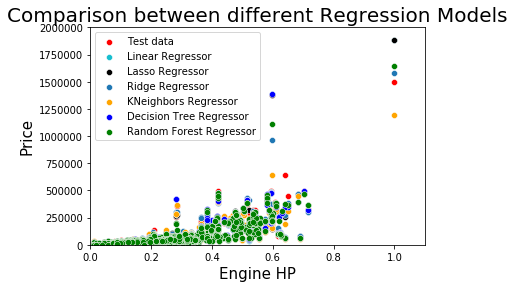

In [189]:
sns.scatterplot(X_test['Engine HP'], Y_test, color = 'red', label='Test data')
sns.scatterplot(X_test['Engine HP'], Y_reg, color = '#17becf',label='Linear Regressor')
sns.scatterplot(X_test['Engine HP'], Y_lasso, color = 'black',label='Lasso Regressor')
sns.scatterplot(X_test['Engine HP'], Y_clf, color = '#1f77b4',label='Ridge Regressor')
sns.scatterplot(X_test['Engine HP'], Y_neigh, color = 'orange',label='KNeighbors Regressor')
sns.scatterplot(X_test['Engine HP'], Y_dtregr, color = 'blue',label='Decision Tree Regressor')
sns.scatterplot(X_test['Engine HP'], Y_rfregr, color = 'green',label='Random Forest Regressor')
plt.title('Comparison between different Regression Models',fontsize=20 )
plt.xlabel("Engine HP",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.xlim(0,1.1)
plt.ylim(0,2000000)
plt.show()

In [183]:
def makeTable(headerRow,columnizedData,columnSpacing=2):
    """Creates a technical paper style, left justified table

    Author: Christopher Collett
    Date: 6/1/2019"""
    from numpy import array,max,vectorize

    cols = array(columnizedData,dtype=str)
    colSizes = [max(vectorize(len)(col)) for col in cols]

    header = ''
    rows = ['' for i in cols[0]]

    for i in range(0,len(headerRow)):
        if len(headerRow[i]) > colSizes[i]: colSizes[i]=len(headerRow[i])
        headerRow[i]+=' '*(colSizes[i]-len(headerRow[i]))
        header+=headerRow[i]
        if not i == len(headerRow)-1: header+=' '*columnSpacing

        for j in range(0,len(cols[i])):
            if len(cols[i][j]) < colSizes[i]:
                cols[i][j]+=' '*(colSizes[i]-len(cols[i][j])+columnSpacing)
            rows[j]+=cols[i][j]
            if not i == len(headerRow)-1: rows[j]+=' '*columnSpacing

    line = '-'*len(header)
    print(line)
    print(header)
    print(line)
    for row in rows: print(row)
    print(line)

In [186]:
header = ['Models','R2']
models = ['Linear Regression', 'Ridge', 'Lasso', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest']
r2 = [regscore, clfscore, lassoscore, neighscore, dtregrscore, rfregrscore]
makeTable(header,[models,r2])

---------------------------------------
Models               R2                
---------------------------------------
Linear Regression    0.9881944408402883
Ridge                0.9611815091343457
Lasso                0.9875742239703886
K-Nearest Neighbors  0.8896136196680545
Decision Tree        0.9982139314325691
Random Forest        0.9848581606259154
---------------------------------------


#### Refrences 

https://stackoverflow.com/questions/51730186/how-to-generate-table-using-python

https://www.kaggle.com/gcdatkin/car-retail-price-prediction

